In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
from COCOdataset import COCODataset

root = "F:"
bbox_file = f"{root}/coco2014/annotations/instances_train2014.json"
cap_file= f"{root}/coco2014/annotations/captions_train2014.json"
image_root = f"{root}/coco2014/train2014"
mycoco = COCODataset(bbox_file, cap_file, image_root, device=device, one_caption=True)

loading annotations into memory...
Done (t=9.67s)
creating index...
index created!
loading annotations into memory...
Done (t=0.42s)
creating index...
index created!


In [4]:
index = 10
image, captions, bbox, cat = mycoco[index]
print("image shape:", image.shape)
print("caption shape:", captions.shape)
print("bbox shape:", bbox.shape)
print("category shape:", cat.shape) 

image shape: torch.Size([3, 640, 480])
caption shape: torch.Size([1, 77])
bbox shape: torch.Size([12, 4])
category shape: torch.Size([12])


In [5]:
# choose one bbox, show its category
mycoco.getCatName(cat[0].item())

'chair'

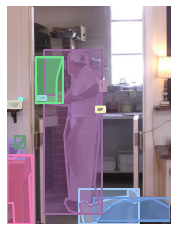

In [6]:
mycoco.showBboxAnn(index)

In [7]:
# one image has five captions
mycoco.showCaptionAnn(index)

a person in white is standing in a kitchen
A chef slides a pizza into a brick oven.
a man wearing an apron and standing next to an oven
A man with a ball cap and an apron using a brick oven. 
The baker is getting ready for his bread to be ready.


In [10]:
train_loader = torch.utils.data.DataLoader(
    mycoco, batch_size = 4, collate_fn = mycoco.gen_collate()
)

In [15]:
epoch = 1
for i in range(epoch):
    for j, (image, captions, bbox, cat) in enumerate(train_loader):
        print(type(image))
        print(len(image))
        print(image[0].shape)
        print(image[1].shape)
        print(image[2].shape)
        print(image[3].shape)
        print(captions.shape)
        break
    break

<class 'list'>
4
torch.Size([3, 480, 640])
torch.Size([3, 429, 640])
torch.Size([3, 640, 480])
torch.Size([3, 427, 640])
torch.Size([4, 77])
